
<!DOCTYPE doctype html>

<html lang="en">
<head>
<!-- Urbis magnitudo. Fabulas magnitudo. -->
<meta charset="utf-8"/>
<style>a.edit_from_site {display: none !important;}</style>
<title>
  The 50 Best Sandwiches in Chicago |
  Chicago magazine
      |  November 2012
    </title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable = no" name="viewport">
<meta content="Our list of Chicago’s 50 best sandwiches, ranked in order of deliciousness" name="description"/>
<!-- <meta name="description" content="Our list of Chicago’s 50 best sandwiches, ranked in order of deliciousness"> -->
<meta content="sandwiches, dining" name="keywords"/>
<meta content="37873197144" property="fb:pages">
<link href="//www.googletagservices.com" rel="dns-prefetch"/>
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//media.chicagomag.com" rel="dns-prefetch"/>
<link href="//ox-d.godengo.com/" r
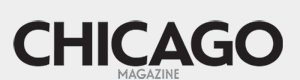

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

url_base = 'http://www.chicagomag.com'
url_sub = '/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/'
url = url_base + url_sub

html = urlopen(url)
soup = BeautifulSoup(html, "html.parser")

soup

In [2]:
print(soup.find_all('div', 'sammy'))

[<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br>
Old Oak Tap<br>
<em>Read more</em> </br></br></a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">2</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/"><b>Fried Bologna</b><br/>
Au Cheval<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">3</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/"><b>Woodland Mushroom</b><br/>
Xoco<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">4</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Al

In [3]:
len(soup.find_all('div', 'sammy'))

50

In [4]:
print(soup.find_all('div', 'sammy')[0])

<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br>
Old Oak Tap<br>
<em>Read more</em> </br></br></a></div>
</div>


In [5]:
tmp_one = soup.find_all('div', 'sammy')[0]
type(tmp_one)

bs4.element.Tag

In [6]:
tmp_one.find(class_='sammyRank')

<div class="sammyRank">1</div>

In [7]:
tmp_one.find(class_='sammyRank').get_text()

'1'

In [8]:
tmp_one.find(class_='sammyListing').get_text()

'BLT\r\nOld Oak Tap\nRead more '

In [9]:
tmp_one.find('a')['href']

'/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

In [10]:
import re

tmp_string = tmp_one.find(class_='sammyListing').get_text()
re.split(('\n|\r\n'), tmp_string)

print(re.split(('\n|\r\n'), tmp_string)[0])
print(re.split(('\n|\r\n'), tmp_string)[1])

BLT
Old Oak Tap


In [11]:
from urllib.parse import urljoin

rank = []
main_menu = []
cafe_name = []
url_add = []

list_soup = soup.find_all('div', 'sammy')

for item in list_soup:
    rank.append(item.find(class_='sammyRank').get_text())
    
    tmp_string = item.find(class_='sammyListing').get_text()
    
    main_menu.append(re.split(('\n|\r\n'), tmp_string)[0])
    cafe_name.append(re.split(('\n|\r\n'), tmp_string)[1])
    
    url_add.append(urljoin(url_base, item.find('a')['href']))

In [12]:
rank[:5]

['1', '2', '3', '4', '5']

In [13]:
main_menu[:5]

['BLT', 'Fried Bologna', 'Woodland Mushroom', 'Roast Beef', 'PB&L']

In [14]:
cafe_name[:5]

['Old Oak Tap', 'Au Cheval', 'Xoco', 'Al’s Deli', 'Publican Quality Meats']

In [15]:
url_add[:5]

['http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/']

In [16]:
len(rank), len(main_menu), len(cafe_name), len(url_add)

(50, 50, 50, 50)

In [17]:
import pandas as pd

data = {'Rank':rank, 'Menu':main_menu, 'Cafe':cafe_name, 'URL':url_add}
df = pd.DataFrame(data)
df.head() 

,Cafe,Menu,Rank,URL
0,Old Oak Tap,BLT,1,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,Au Cheval,Fried Bologna,2,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,Xoco,Woodland Mushroom,3,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,Al’s Deli,Roast Beef,4,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,Publican Quality Meats,PB&L,5,http://www.chicagomag.com/Chicago-Magazine/Nov...


In [18]:
df = pd.DataFrame(data, columns=['Rank', 'Cafe', 'Menu', 'URL'])
df.head(5)

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...


In [19]:
df.to_csv('../data/best_sandwiches_list_chicago.csv', sep=',', encoding='UTF-8')

In [20]:
df['URL'][0]

'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'


<!DOCTYPE doctype html>

<html lang="en">
<head>
<!-- Urbis magnitudo. Fabulas magnitudo. -->
<meta charset="utf-8"/>
<style>a.edit_from_site {display: none !important;}</style>
<title>
  1. Old Oak Tap BLT |
  Chicago magazine
      |  November 2012
    </title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable = no" name="viewport">
<meta content="“Truly inspired.”" name="description"/>
<!-- <meta name="description" content="&#8220;Truly inspired.&#8221;"> -->
<meta content="" name="keywords"/>
<meta content="37873197144" property="fb:pages">
<link href="//www.googletagservices.com" rel="dns-prefetch"/>
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//media.chicagomag.com" rel="dns-prefetch"/>
<link href="//ox-d.godengo.com/" rel="dns-prefetch"/>
<link href="//www.google-analytics.com" rel="dns-prefetch"/>
<link href="//ping.chartbeat.net" rel="dns-prefetch"/>
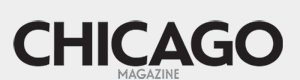

In [21]:
html = urlopen(df['URL'][0])
soup_tmp = BeautifulSoup(html, "html.parser")
soup_tmp

In [22]:
print(soup_tmp.find('p', 'addy'))

<p class="addy">
<em>$10. 2109 W. Chicago Ave., 773-772-0406, <a href="http://www.theoldoaktap.com/">theoldoaktap.com</a></em></p>


In [23]:
price_tmp = soup_tmp.find('p', 'addy').get_text()
price_tmp

'\n$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com'

In [24]:
price_tmp.split()

['$10.', '2109', 'W.', 'Chicago', 'Ave.,', '773-772-0406,', 'theoldoaktap.com']

In [25]:
price_tmp.split()[0][:-1]

'$10'

In [26]:
' '.join(price_tmp.split()[1:-2])

'2109 W. Chicago Ave.,'

In [27]:
price = []
address = []

for n in df.index[:3]:
    html = urlopen(df['URL'][n])
    soup_tmp = BeautifulSoup(html, 'lxml')
    
    gettings = soup_tmp.find('p', 'addy').get_text()
    
    price.append(gettings.split()[0][:-1])
    address.append(' '.join(gettings.split()[1:-2]))

In [28]:
price

['$10', '$9', '$9.50']

In [29]:
address

['2109 W. Chicago Ave.,', '800 W. Randolph St.,', '445 N. Clark St.,']

In [30]:
from tqdm import tqdm_notebook

price = []
address = []

for n in tqdm_notebook(df.index):
    html = urlopen(df['URL'][n])
    soup_tmp = BeautifulSoup(html, 'lxml')
    
    gettings = soup_tmp.find('p', 'addy').get_text()
    
    price.append(gettings.split()[0][:-1])
    address.append(' '.join(gettings.split()[1:-2]))

In [31]:
price

['$10',
 '$9',
 '$9.50',
 '$9.40',
 '$10',
 '$7.25',
 '$16',
 '$10',
 '$9',
 '$17',
 '$11',
 '$5.49',
 '$14',
 '$10',
 '$13',
 '$4.50',
 '$11.95',
 '$11.50',
 '$6.25',
 '$15',
 '$5',
 '$6',
 '$8',
 '$5.99',
 '$7.52',
 '$11.95',
 '$7.50',
 '$12.95',
 '$7',
 '$21',
 '$9.79',
 '$9.75',
 '$13',
 '$7.95',
 '$9',
 '$9',
 '$8',
 '$8',
 '$7',
 '$6',
 '$7.25',
 '$11',
 '$6',
 '$9',
 '$5.49',
 '$8',
 '$6.50',
 '$7.50',
 '$8.75',
 '$6.85']

In [32]:
address

['2109 W. Chicago Ave.,',
 '800 W. Randolph St.,',
 '445 N. Clark St.,',
 '914 Noyes St., Evanston,',
 '825 W. Fulton Mkt.,',
 '100 E. Walton',
 '1639 S. Wabash Ave.,',
 '2211 W. North Ave.,',
 '3619 W. North Ave.,',
 '3267 S. Halsted St.,',
 '2537 N. Kedzie Blvd.,',
 'Multiple',
 '3124 N. Broadway,',
 '3455 N. Southport Ave.,',
 '2657 N. Kedzie Ave.,',
 '1120 W. Grand Ave.,',
 '1141 S. Jefferson St.,',
 '333 E. Benton Pl.,',
 '1411 N. Wells St.,',
 '1747 N. Damen Ave.,',
 '3209 W. Irving Park',
 'Multiple',
 '5347 N. Clark St.,',
 '2954 W. Irving Park Rd.,',
 'Multiple',
 '191 Skokie Valley Rd., Highland Park,',
 'Multiple',
 '1818 W. Wilson Ave.,',
 '2517 W. Division St.,',
 '218 W. Kinzie',
 'Multiple',
 '1547 N. Wells St.,',
 '415 N. Milwaukee Ave.,',
 '1840 N. Damen Ave.,',
 '1220 W. Webster Ave.,',
 '5357 N. Ashland Ave.,',
 '1834 W. Montrose Ave.,',
 '615 N. State St.,',
 'Multiple',
 '241 N. York Rd., Elmhurst,',
 '1323 E. 57th St.,',
 '655 Forest Ave., Lake Forest,',
 'Hotel L

In [33]:
len(price), len(address), len(df)

(50, 50, 50)

In [34]:
df['Price'] = price
df['Address'] = address

df = df.loc[:, ['Rank', 'Cafe', 'Menu', 'Price', 'Address']]
df.set_index('Rank', inplace=True)
df.head() 

,Cafe,Menu,Price,Address
Rank,,,,
1,Old Oak Tap,BLT,$10,"2109 W. Chicago Ave.,"
2,Au Cheval,Fried Bologna,$9,"800 W. Randolph St.,"
3,Xoco,Woodland Mushroom,$9.50,"445 N. Clark St.,"
4,Al’s Deli,Roast Beef,$9.40,"914 Noyes St., Evanston,"
5,Publican Quality Meats,PB&L,$10,"825 W. Fulton Mkt.,"


In [35]:
df.to_csv('../data/best_sandwiches_list_chicago2.csv', sep=',', encoding='UTF-8')

In [42]:
import folium
import pandas as pd
import googlemaps
import numpy as np

In [43]:
df = pd.read_csv('../data/best_sandwiches_list_chicago2.csv', index_col=0)
df.head(5)

,Cafe,Menu,Price,Address
Rank,,,,
1,Old Oak Tap,BLT,$10,"2109 W. Chicago Ave.,"
2,Au Cheval,Fried Bologna,$9,"800 W. Randolph St.,"
3,Xoco,Woodland Mushroom,$9.50,"445 N. Clark St.,"
4,Al’s Deli,Roast Beef,$9.40,"914 Noyes St., Evanston,"
5,Publican Quality Meats,PB&L,$10,"825 W. Fulton Mkt.,"


In [56]:
gmaps_key = ""
gmaps = googlemaps.Client(key=gmaps_key)

In [79]:
lat = []
lng = []

for n in tqdm_notebook(df.index):
    if df['Address'][n] != 'Multiple':
        target_name = df['Address'][n]+', '+'Cicago'
        gmaps_output = gmaps.geocode(target_name)
        location_output = gmaps_output[0].get('geometry')
        lat.append(location_output['location']['lat'])
        lng.append(location_output['location']['lng'])
        
    else:
        lat.append(np.nan)
        lng.append(np.nan)

In [86]:
len(lat), len(lng)

(50, 50)

In [87]:
df['lat'] = lat
df['lng'] = lng
df.head()

,Cafe,Menu,Price,Address,lat,lng
Rank,,,,,,
1,Old Oak Tap,BLT,$10,"2109 W. Chicago Ave.,",41.895605,-87.679961
2,Au Cheval,Fried Bologna,$9,"800 W. Randolph St.,",41.884658,-87.647667
3,Xoco,Woodland Mushroom,$9.50,"445 N. Clark St.,",41.890618,-87.630933
4,Al’s Deli,Roast Beef,$9.40,"914 Noyes St., Evanston,",42.058322,-87.683748
5,Publican Quality Meats,PB&L,$10,"825 W. Fulton Mkt.,",41.886603,-87.648498


In [88]:
mapping = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], 
                                      zoom_start=11)
folium.Marker([df['lat'].mean(), df['lng'].mean()], 
                                      popup='center').add_to(mapping)
mapping

In [89]:
mapping = folium.Map(location=[df['lat'].mean(), df['lng'].mean()],
                     zoom_start=11)

for n in df.index:
    if df['Address'][n] != 'Multiple':
        folium.Marker([df['lat'][n], df['lng'][n]], popup=df['Cafe'][n]).add_to(mapping)
        
mapping 